<a href="https://colab.research.google.com/github/s-c-soma/deep_context_graph/blob/main/code/TrendDetection_neurips_trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
# Mount google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Mounted at /content/drive


# Importing libs

In [99]:
import requests
import nlpretext as nlp
from bs4 import BeautifulSoup

In [100]:
import requests
import json
import pandas as pd
import numpy as np
!pip install stop_words
!pip install nlpretext

# Loading events data

In [101]:
file_path = '/content/drive/Shared drives/1DeepContextGraph/1DeepContextGraph/code/data/'

In [102]:
import pandas as pd

df=pd.read_csv(file_path+"neurips_data_2020.csv")

In [103]:
df

,type,sources,titles,authors,abstract,urls
0,conference,neurips,A graph similarity for deep learning,Seongmin Ok,Graph neural networks (GNNs) have been success...,https://papers.nips.cc/paper/2020/hash/0004d0b...
1,conference,neurips,An Unsupervised Information-Theoretic Perceptu...,"Sangnie Bhardwaj, Ian Fischer, Johannes Ballé,...",Tractable models of human perception have prov...,https://papers.nips.cc/paper/2020/hash/00482b9...
2,conference,neurips,Self-Supervised MultiModal Versatile Networks,"Jean-Baptiste Alayrac, Adria Recasens, Rosalia...",Videos are a rich source of multi-modal superv...,https://papers.nips.cc/paper/2020/hash/0060ef4...
3,conference,neurips,"Benchmarking Deep Inverse Models over time, an...","Simiao Ren, Willie Padilla, Jordan Malof",We consider the task of solving generic invers...,https://papers.nips.cc/paper/2020/hash/007ff38...
4,conference,neurips,Off-Policy Evaluation and Learning for Externa...,"Masatoshi Uehara, Masahiro Kato, Shota Yasui",We consider the evaluation and training of a n...,https://papers.nips.cc/paper/2020/hash/0084ae4...
...,...,...,...,...,...,...
1893,conference,neurips,Distributed Distillation for On-Device Learning,"Ilai Bistritz, Ariana Mann, Nicholas Bambos",On-device learning promises collaborative trai...,https://papers.nips.cc/paper/2020/hash/fef6f97...
1894,conference,neurips,COOT: Cooperative Hierarchical Transformer for...,"Simon Ging, Mohammadreza Zolfaghari, Hamed Pir...",Many real-world video-text tasks involve diffe...,https://papers.nips.cc/paper/2020/hash/ff0abbc...
1895,conference,neurips,Passport-aware Normalization for Deep Model Pr...,"Jie Zhang, Dongdong Chen, Jing Liao, Weiming Z...",Despite tremendous success in many application...,https://papers.nips.cc/paper/2020/hash/ff1418e...
1896,conference,neurips,Sampling-Decomposable Generative Adversarial R...,"Binbin Jin, Defu Lian, Zheng Liu, Qi Liu, Jian...",Recommendation techniques are important approa...,https://papers.nips.cc/paper/2020/hash/ff42b03...


In [104]:
df1 = df['titles']

In [105]:
df1.columns =["titles"]

In [106]:
df1.iloc[5]

'Neural Methods for Point-wise Dependency Estimation'

# Methods

In [107]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

nltk.download('stopwords')
stopwords = stopwords.words('english')

def join_tokens(list_of_tokens):
    outstr = TreebankWordDetokenizer().detokenize(list_of_tokens)
    return outstr

def filter_stopwords_from_list(titles):
    word_list = titles
    title_list = []
    new_word_list = []
    new_title_list= []
    for title in titles:
            #print (title)
            title_list =  nltk.word_tokenize(title)
            #print (words)
            for word in title_list:
                print (word)
                if word.lower() not in stopwords:
                    new_word_list.append(word)
                    #print("joined {} :".format(word))
            #print ("new title list :",new_word_list)
            new_title = join_tokens(new_word_list)
            #print ("\n New title : ", new_title)
            new_word_list =[]
            # print ("old : {}  \n -----> new : {}\n\n".format(title, new_title))
            new_title_list.append(new_title)
    # print ("========================\n")
    # print ("new list of titles: \n: ===> ",new_title_list )
    return new_title_list
        #print (new_line)
        #filtered_words = [word for word in words if word.lower() not in stopwords]
        #print (words)

# receives a list of texts and creates n-grams for each of the text as well as for the entire corpus
def getNGramsConcat(lstText, ngramsCount):
  import re
  from nltk.util import ngrams
  s = " ".join(lstText) # this may be needed to crea
  s = s.lower()
  s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
  tokens = [token for token in s.split(" ") if token != ""]
  corpusNGrams = list(ngrams(tokens, ngramsCount))
  corpusNGramsConcat = ["-".join(e) for e in corpusNGrams]

  txtNGrams = []
  txtNGramsConcat = []
  for t in lstText:
    t2 = t.lower()
    t2 = re.sub(r'[^a-zA-Z0-9\s]', ' ', t2)
    tokens2 = [token2 for token2 in t2.split(" ") if token2 != ""]
    ng = list(ngrams(tokens2, ngramsCount))
    txtNGrams.append(ng)
    txtNGramsConcat.append( ["-".join(e) for e in ng])

  return (txtNGramsConcat, corpusNGramsConcat)

# titles = dfEvents["title"]
# filteredTitles = filter_stopwords_from_list(titles)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Cleaning

In [108]:
df1= df1.dropna()

# Remove small words

In [109]:
import nlpretext as nlp
from nlpretext.token.preprocess import remove_smallwords

# Compute N-Gram

In [151]:
df["titles"][0]

'A graph similarity for deep learning'

In [152]:
texts = df["titles"] #+ ". " + df["abstract"]
texts

0                    A graph similarity for deep learning
1       An Unsupervised Information-Theoretic Perceptu...
2           Self-Supervised MultiModal Versatile Networks
3       Benchmarking Deep Inverse Models over time, an...
4       Off-Policy Evaluation and Learning for Externa...
                              ...                        
1893      Distributed Distillation for On-Device Learning
1894    COOT: Cooperative Hierarchical Transformer for...
1895    Passport-aware Normalization for Deep Model Pr...
1896    Sampling-Decomposable Generative Adversarial R...
1897       Limits to Depth Efficiencies of Self-Attention
Name: titles, Length: 1898, dtype: object

In [153]:
filteredTexts = filter_stopwords_from_list(texts)
(lstNGrams, corpusNGrams) = getNGramsConcat(filteredTexts, ngramsCount = 3)

Streaming output truncated to the last 5000 lines.
Switching
System
Perspective
and
Convergence
Analysis
of
Q-Learning
Algorithms
Kernel
Alignment
Risk
Estimator
:
Risk
Prediction
from
Training
Data
Calibrating
CNNs
for
Lifelong
Learning
Online
Convex
Optimization
Over
Erdos-Renyi
Random
Networks
Robustness
of
Bayesian
Neural
Networks
to
Gradient-Based
Attacks
Parametric
Instance
Classification
for
Unsupervised
Visual
Feature
learning
Sparse
Weight
Activation
Training
Collapsing
Bandits
and
Their
Application
to
Public
Health
Intervention
Neural
Sparse
Voxel
Fields
A
Flexible
Framework
for
Designing
Trainable
Priors
with
Adaptive
Smoothing
and
Game
Encoding
The
Discrete
Gaussian
for
Differential
Privacy
Robust
Sub-Gaussian
Principal
Component
Analysis
and
Width-Independent
Schatten
Packing
Adaptive
Importance
Sampling
for
Finite-Sum
Optimization
and
Sampling
with
Decreasing
Step-Sizes
Learning
efficient
task-dependent
representations
with
synaptic
plasticity
A
Contour
Stochastic
Gradien

In [154]:
corpusNGrams[0]
print(len(corpusNGrams))
print(len(filteredTexts))
print(len(lstNGrams))

13255
1898
1898


In [155]:
lstNGrams[0]

['graph-similarity-deep', 'similarity-deep-learning']

In [156]:
len(lstNGrams)

1898

In [157]:
big_grams = []
for x in range(0,len(lstNGrams)):
    big_grams.append(remove_smallwords(lstNGrams[x],3)) 

In [158]:
big_grams[1000]

['counterexample-guided-learning',
 'guided-learning-monotonic',
 'learning-monotonic-neural',
 'monotonic-neural-networks']

In [159]:
mid_grams = big_grams[: len(big_grams) - 2]

In [160]:
print(len(mid_grams))

1896


In [161]:
for x in range(0,len(mid_grams)):
    mid_grams[x] = big_grams[x][: len(big_grams[x]) - 2]

In [162]:
mid_grams[50]

['fixmatch-simplifying-semi',
 'simplifying-semi-supervised',
 'semi-supervised-learning']

# Topic Modeling

In [176]:
import numpy as np
def runLDA(doc_set, numOfTopics): # source: https://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html  (modified by Renato)
    
    np.random.seed(1) # LDA uses randomness in its calculation. Setting fixed seed to make sure we always get the same result
    
    from nltk.tokenize import RegexpTokenizer
    from stop_words import get_stop_words
    from nltk.stem.porter import PorterStemmer
    from gensim import corpora, models
    import gensim


    tokenizer = RegexpTokenizer(r'[\w-]+')

    # create English stop words list
    en_stop = get_stop_words('en')

    # Create p_stemmer of class PorterStemmer
    # p_stemmer = PorterStemmer()

   
    # list for tokenized documents in loop
    texts = []

    # loop through document list
    for d in doc_set:
        d = " ".join(d)
        # # removing "'"
        # d = d.replace("'", "")
           
        # clean and tokenize document string
        raw = d.lower()
        tokens = tokenizer.tokenize(raw)

        # remove stop words from tokens
        # stopped_tokens = [i for i in tokens if not i in en_stop]

        # stem tokens
        # stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
     
        # add tokens to list
        # texts.append(stemmed_tokens)
        texts.append(tokens)

    # turn our tokenized documents into a id <-> term dictionary
    dictionary = corpora.Dictionary(texts)
    
    # TODO: removing high frequency words
    #dictionary.filter_extremes(no_below=1, no_above=0.6, keep_n=1)

    # convert tokenized documents into a document-term matrix
    corpus = [dictionary.doc2bow(text) for text in texts]

    # generate LDA model
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=numOfTopics, id2word = dictionary, passes=20)
    
    return ldamodel, texts

In [177]:
from gensim import corpora, models
numTopics = 10
(ldamodel, corpus) = runLDA(lstNGrams, numTopics) #(mid_grams, numTopics) #(lstNGrams, numTopics)

# corpus
# print("")
print(f"Top {numTopics} TOPICS:")
ldamodel.print_topics(num_topics=numTopics, num_words=5)

Top 10 TOPICS:


[(0,
  '0.002*"deep-reinforcement-learning" + 0.002*"deep-neural-networks" + 0.002*"stochastic-gradient-descent" + 0.002*"multi-agent-reinforcement" + 0.002*"agent-reinforcement-learning"'),
 (1,
  '0.008*"graph-neural-networks" + 0.002*"based-reinforcement-learning" + 0.002*"end-to-end" + 0.001*"deep-reinforcement-learning" + 0.001*"to-end-learning"'),
 (2,
  '0.003*"neural-architecture-search" + 0.001*"reinforcement-learning-via" + 0.001*"based-reinforcement-learning" + 0.001*"out-of-distribution" + 0.001*"generalized-linear-models"'),
 (3,
  '0.001*"out-of-distribution" + 0.001*"based-reinforcement-learning" + 0.001*"of-distribution-detection" + 0.001*"graph-convolutional-networks" + 0.001*"dependent-label-noise"'),
 (4,
  '0.002*"deep-reinforcement-learning" + 0.001*"graph-neural-networks" + 0.001*"neural-network-training" + 0.001*"graph-convolutional-networks" + 0.001*"training-generative-adversarial"'),
 (5,
  '0.001*"graph-neural-network" + 0.001*"neural-networks-via" + 0.001*"m

In [178]:
topn_words = {'Topic_' + str(i): [word for word, prob in ldamodel.show_topic(i, topn=10)] for i in range(0, ldamodel.num_topics)}

In [179]:
topn_words

{'Topic_0': ['deep-reinforcement-learning',
  'deep-neural-networks',
  'stochastic-gradient-descent',
  'multi-agent-reinforcement',
  'agent-reinforcement-learning',
  'deep-neural-network',
  'training-deep-neural',
  'bayesian-neural-networks',
  'instance-wise-feature',
  'graph-neural-networks'],
 'Topic_1': ['graph-neural-networks',
  'based-reinforcement-learning',
  'end-to-end',
  'deep-reinforcement-learning',
  'to-end-learning',
  'neural-networks-via',
  'pooling-graph-neural',
  'hierarchical-reinforcement-learning',
  'distributional-reinforcement-learning',
  'no-regret-learning'],
 'Topic_2': ['neural-architecture-search',
  'reinforcement-learning-via',
  'based-reinforcement-learning',
  'out-of-distribution',
  'generalized-linear-models',
  'neural-tangent-kernel',
  'low-rank-matrix',
  'supervised-contrastive-learning',
  'bayesian-optimization-via',
  'conditional-meta-learning'],
 'Topic_3': ['out-of-distribution',
  'based-reinforcement-learning',
  'of-distr

In [180]:
topn_words['Topic_0']

['deep-reinforcement-learning',
 'deep-neural-networks',
 'stochastic-gradient-descent',
 'multi-agent-reinforcement',
 'agent-reinforcement-learning',
 'deep-neural-network',
 'training-deep-neural',
 'bayesian-neural-networks',
 'instance-wise-feature',
 'graph-neural-networks']

In [181]:
from pprint import pprint# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools

In [182]:
from gensim import corpora, models, similarities

ldamodel.save('lda.model')

In [183]:
ldamodel.print_topics(num_topics=200, num_words=10)

[(0,
  '0.002*"deep-reinforcement-learning" + 0.002*"deep-neural-networks" + 0.002*"stochastic-gradient-descent" + 0.002*"multi-agent-reinforcement" + 0.002*"agent-reinforcement-learning" + 0.002*"deep-neural-network" + 0.001*"training-deep-neural" + 0.001*"bayesian-neural-networks" + 0.001*"instance-wise-feature" + 0.001*"graph-neural-networks"'),
 (1,
  '0.008*"graph-neural-networks" + 0.002*"based-reinforcement-learning" + 0.002*"end-to-end" + 0.001*"deep-reinforcement-learning" + 0.001*"to-end-learning" + 0.001*"neural-networks-via" + 0.001*"pooling-graph-neural" + 0.001*"hierarchical-reinforcement-learning" + 0.001*"distributional-reinforcement-learning" + 0.001*"no-regret-learning"'),
 (2,
  '0.003*"neural-architecture-search" + 0.001*"reinforcement-learning-via" + 0.001*"based-reinforcement-learning" + 0.001*"out-of-distribution" + 0.001*"generalized-linear-models" + 0.001*"neural-tangent-kernel" + 0.001*"low-rank-matrix" + 0.001*"supervised-contrastive-learning" + 0.001*"bayesi

In [184]:
ldamodel.show_topics(num_topics=100, num_words=5)

[(0,
  '0.002*"deep-reinforcement-learning" + 0.002*"deep-neural-networks" + 0.002*"stochastic-gradient-descent" + 0.002*"multi-agent-reinforcement" + 0.002*"agent-reinforcement-learning"'),
 (1,
  '0.008*"graph-neural-networks" + 0.002*"based-reinforcement-learning" + 0.002*"end-to-end" + 0.001*"deep-reinforcement-learning" + 0.001*"to-end-learning"'),
 (2,
  '0.003*"neural-architecture-search" + 0.001*"reinforcement-learning-via" + 0.001*"based-reinforcement-learning" + 0.001*"out-of-distribution" + 0.001*"generalized-linear-models"'),
 (3,
  '0.001*"out-of-distribution" + 0.001*"based-reinforcement-learning" + 0.001*"of-distribution-detection" + 0.001*"graph-convolutional-networks" + 0.001*"dependent-label-noise"'),
 (4,
  '0.002*"deep-reinforcement-learning" + 0.001*"graph-neural-networks" + 0.001*"neural-network-training" + 0.001*"graph-convolutional-networks" + 0.001*"training-generative-adversarial"'),
 (5,
  '0.001*"graph-neural-network" + 0.001*"neural-networks-via" + 0.001*"m

In [185]:
my_showed_topics = ldamodel.show_topics(num_topics=10, num_words=10, log=False, formatted=False)

In [186]:
my_showed_topics

[(0,
  [('deep-reinforcement-learning', 0.0021742978),
   ('deep-neural-networks', 0.0021742897),
   ('stochastic-gradient-descent', 0.0016439942),
   ('multi-agent-reinforcement', 0.0016439654),
   ('agent-reinforcement-learning', 0.0016439654),
   ('deep-neural-network', 0.0016439507),
   ('training-deep-neural', 0.0011136552),
   ('bayesian-neural-networks', 0.0011136543),
   ('instance-wise-feature', 0.0011136441),
   ('graph-neural-networks', 0.0011136072)]),
 (1,
  [('graph-neural-networks', 0.00839779),
   ('based-reinforcement-learning', 0.0017899793),
   ('end-to-end', 0.0017899644),
   ('deep-reinforcement-learning', 0.0012125607),
   ('to-end-learning', 0.0012125523),
   ('neural-networks-via', 0.0011800694),
   ('pooling-graph-neural', 0.0010923876),
   ('hierarchical-reinforcement-learning', 0.0006351546),
   ('distributional-reinforcement-learning', 0.00063515455),
   ('no-regret-learning', 0.00063515146)]),
 (2,
  [('neural-architecture-search', 0.002813525),
   ('reinfo

In [187]:
my_top_topics = ldamodel.top_topics(corpus=corpus, texts=corpus, dictionary=None, window_size=None, coherence='u_mass', topn=20, processes=- 1)

In [188]:
my_top_topics

[([(0.0010967903, 'graph-neural-network'),
   (0.0010967896, 'neural-networks-via'),
   (0.001096783, 'meta-learning-approach'),
   (0.0010967808, 'gradient-descent-ascent'),
   (0.0010967777, 'heterogeneous-treatment-effects'),
   (0.0010967777, 'reinforcement-learning-metric'),
   (0.0010967619, 'graph-convolutional-networks'),
   (0.0010967535, 'deep-reinforcement-learning'),
   (0.0005745076, 'personalized-federated-learning'),
   (0.00057450746, 'generalization-reinforcement-learning'),
   (0.00057450513, 'discrete-graphical-models'),
   (0.00057450513, 'off-policy-evaluation'),
   (0.00057450484, 'agnostic-meta-learning'),
   (0.00057450484, 'model-agnostic-meta'),
   (0.0005745041, 'multi-agent-communication'),
   (0.000574504, 'wide-neural-networks'),
   (0.0005745037, 'video-object-segmentation'),
   (0.0005745036, 'stochastic-convex-optimization'),
   (0.0005745036, 'multi-armed-bandits'),
   (0.00057450344, 'multivariate-time-series')],
  -20.544195362654342),
 ([(0.00281352

In [189]:
my_top_topics[0][0][0][1]

'graph-neural-network'

In [190]:
for x in range(0,len(my_top_topics[0])):
    print(my_top_topics[x][0][0][1] )

graph-neural-network
neural-architecture-search


In [191]:
print (len(my_top_topics[0]))

2


In [192]:
print (len(my_top_topics[0][0]))

20


In [193]:
print (len(my_top_topics[0][0][0]))

2


# Wordcloud

In [194]:
!pip install wordcloud

In [195]:
ldamodel.num_topics

10

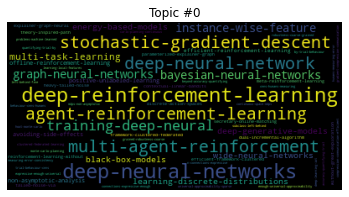

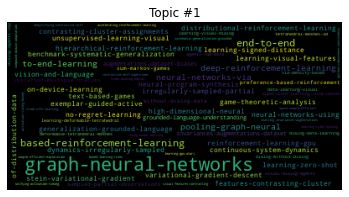

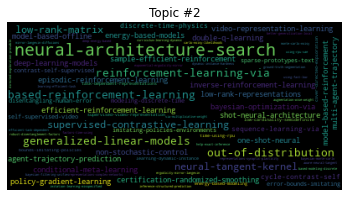

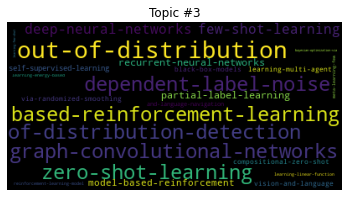

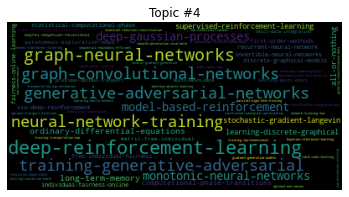

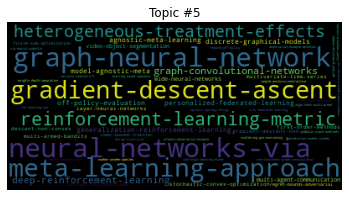

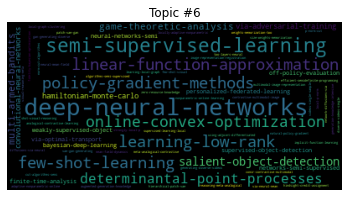

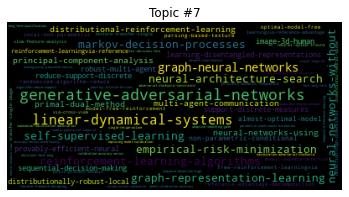

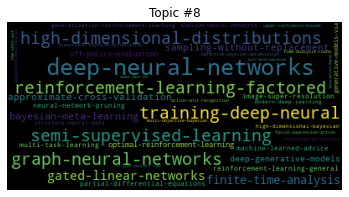

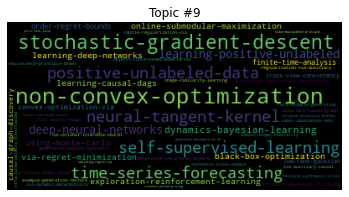

In [196]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import gensim
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary


common_corpus = corpus


for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()
    


In [197]:
#topic_dict = dict(ldamodel.show_topic(t, 100))
#theword=[]
with open('topic_file.txt', 'w') as topic_file:
    for t in range(ldamodel.num_topics):
        #theword=[]
        dict_topics = dict(ldamodel.show_topic(t, 10))

        theword = ' '.join(dict_topics)
        print(theword)
        topic_file.writelines(theword)
        topic_file.write('\n')

deep-reinforcement-learning deep-neural-networks stochastic-gradient-descent multi-agent-reinforcement agent-reinforcement-learning deep-neural-network training-deep-neural bayesian-neural-networks instance-wise-feature graph-neural-networks
graph-neural-networks based-reinforcement-learning end-to-end deep-reinforcement-learning to-end-learning neural-networks-via pooling-graph-neural hierarchical-reinforcement-learning distributional-reinforcement-learning no-regret-learning
neural-architecture-search reinforcement-learning-via based-reinforcement-learning out-of-distribution generalized-linear-models neural-tangent-kernel low-rank-matrix supervised-contrastive-learning bayesian-optimization-via conditional-meta-learning
out-of-distribution based-reinforcement-learning of-distribution-detection graph-convolutional-networks dependent-label-noise zero-shot-learning few-shot-learning deep-neural-networks recurrent-neural-networks partial-label-learning
deep-reinforcement-learning graph-

In [198]:

from gensim import corpora, models
numTopics = 10
(ldamodel, corpus) = runLDA(lstNGrams, numTopics)

# corpus
# print("")
print(f"Top {numTopics} TOPICS:")
ldamodel.print_topics(num_topics=numTopics, num_words=5)

Top 10 TOPICS:


[(0,
  '0.002*"deep-reinforcement-learning" + 0.002*"deep-neural-networks" + 0.002*"stochastic-gradient-descent" + 0.002*"multi-agent-reinforcement" + 0.002*"agent-reinforcement-learning"'),
 (1,
  '0.008*"graph-neural-networks" + 0.002*"based-reinforcement-learning" + 0.002*"end-to-end" + 0.001*"deep-reinforcement-learning" + 0.001*"to-end-learning"'),
 (2,
  '0.003*"neural-architecture-search" + 0.001*"reinforcement-learning-via" + 0.001*"based-reinforcement-learning" + 0.001*"out-of-distribution" + 0.001*"generalized-linear-models"'),
 (3,
  '0.001*"out-of-distribution" + 0.001*"based-reinforcement-learning" + 0.001*"of-distribution-detection" + 0.001*"graph-convolutional-networks" + 0.001*"dependent-label-noise"'),
 (4,
  '0.002*"deep-reinforcement-learning" + 0.001*"graph-neural-networks" + 0.001*"neural-network-training" + 0.001*"graph-convolutional-networks" + 0.001*"training-generative-adversarial"'),
 (5,
  '0.001*"graph-neural-network" + 0.001*"neural-networks-via" + 0.001*"m

Next Steps:
- Add BERT (https://towardsdatascience.com/understanding-bert-bidirectional-encoder-representations-from-transformers-45ee6cd51eef)

# Visualize Top Words

https://towardsdatascience.com/from-dataframe-to-n-grams-e34e29df3460

In [199]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']

import matplotlib.pyplot as plt
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [200]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [201]:
words = basic_clean(''.join(str(df['titles'].tolist())))

In [202]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(graph, neural, network)                 26
(deep, neural, network)                  23
(deep, reinforcement, learning)          13
(stochastic, gradient, descent)          10
(neural, architecture, search)            9
(neural, tangent, kernel)                 7
(training, deep, neural)                  7
(graph, convolutional, network)           6
(multiagent, reinforcement, learning)     6
(generative, adversarial, network)        6
dtype: int64

In [203]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

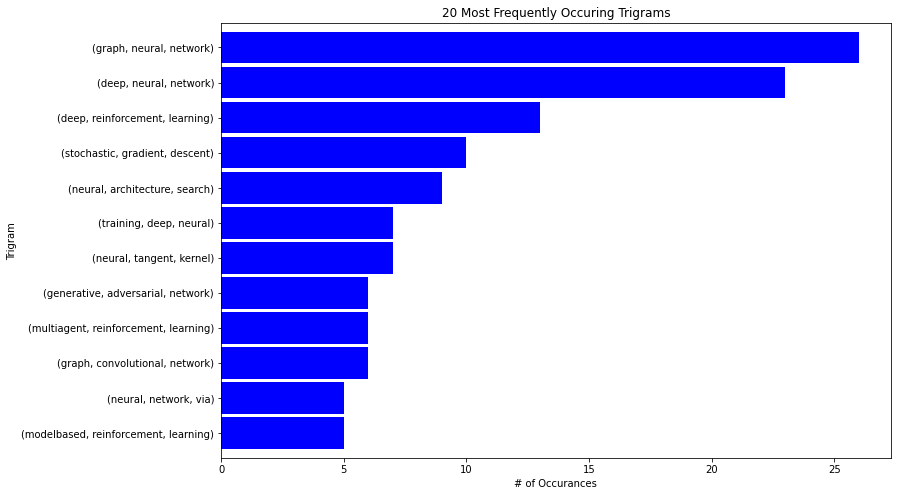

In [205]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')